In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/hrishityelchuri/Desktop/github/grabhack/driver-credit-scoring-engine/data/raw/partners.csv')

In [5]:
df

,partner_id,role,gender,age_group,city_tier,tenure_months,days_active,trips_per_week,earnings_avg,earnings_var,...,cancel_rate,customer_rating,complaints,accidents,night_shift_pct,cashless_ratio,wallet_txn_volume,vehicle_age,past_due_history,good_repayment
0,1,driver,M,<=25,2,36,19,52,638.443420,101.826834,...,0.135795,4.837981,0,0,0.348988,0.350500,160.028448,4.336435,0,1
1,2,merchant,M,<=25,2,17,24,53,444.440684,69.151447,...,0.061321,4.778687,0,0,0.286113,0.915312,104.718719,5.482631,0,1
2,3,merchant,M,26-35,1,61,28,35,659.666189,223.266722,...,0.045608,4.418110,1,0,0.287171,0.642508,134.089531,6.072208,0,1
3,4,driver,F,<=25,3,33,18,58,503.720971,24.461841,...,0.053521,4.782128,0,0,0.279957,0.671180,268.472293,3.909398,0,0
4,5,driver,M,50+,3,27,19,57,637.742060,150.778596,...,0.150525,4.905054,0,0,0.108403,0.785409,0.000000,3.512688,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,driver,M,50+,2,22,26,37,651.340236,178.112415,...,0.009458,4.877334,0,0,0.687393,0.451506,275.217454,4.551144,0,1
7996,7997,driver,M,26-35,3,12,23,31,804.831806,21.553709,...,0.109542,4.864437,0,0,0.562117,0.441517,323.231347,0.000000,1,1
7997,7998,driver,M,26-35,2,13,21,44,648.224239,48.960279,...,0.130103,4.602213,0,0,0.193823,0.741244,240.555107,1.850392,0,1
7998,7999,merchant,M,26-35,1,45,20,81,861.418504,49.013844,...,0.124617,4.975657,0,0,0.212527,0.836395,352.932530,4.547698,0,1


In [6]:
df.shape

(8000, 21)

In [7]:
missing_summary = df.isnull().sum()
print("Missing values per column:\n", missing_summary)

Missing values per column:
 partner_id           0
role                 0
gender               0
age_group            0
city_tier            0
tenure_months        0
days_active          0
trips_per_week       0
earnings_avg         0
earnings_var         0
on_time_rate         0
cancel_rate          0
customer_rating      0
complaints           0
accidents            0
night_shift_pct      0
cashless_ratio       0
wallet_txn_volume    0
vehicle_age          0
past_due_history     0
good_repayment       0
dtype: int64


In [8]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   partner_id         8000 non-null   int64  
 1   role               8000 non-null   object 
 2   gender             8000 non-null   object 
 3   age_group          8000 non-null   object 
 4   city_tier          8000 non-null   int64  
 5   tenure_months      8000 non-null   int64  
 6   days_active        8000 non-null   int64  
 7   trips_per_week     8000 non-null   int64  
 8   earnings_avg       8000 non-null   float64
 9   earnings_var       8000 non-null   float64
 10  on_time_rate       8000 non-null   float64
 11  cancel_rate        8000 non-null   float64
 12  customer_rating    8000 non-null   float64
 13  complaints         8000 non-null   int64  
 14  accidents          8000 non-null   int64  
 15  night_shift_pct    8000 non-null   float64
 16  cashless_ratio     8000 

,partner_id,city_tier,tenure_months,days_active,trips_per_week,earnings_avg,earnings_var,on_time_rate,cancel_rate,customer_rating,complaints,accidents,night_shift_pct,cashless_ratio,wallet_txn_volume,vehicle_age,past_due_history,good_repayment
count,8000.00000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,1.736875,27.501875,21.47300,54.654125,699.099802,159.437932,0.928441,0.099633,4.724107,0.15400,0.027500,0.282425,0.666816,249.481394,4.054313,0.078000,0.946000
std,2309.54541,0.763684,15.826546,4.83285,15.152861,180.689756,111.752315,0.046717,0.064370,0.184043,0.39122,0.164308,0.157580,0.178807,100.473887,1.951738,0.268188,0.226032
min,1.00000,1.000000,1.000000,5.00000,5.000000,100.000000,5.000000,0.758651,0.000202,3.959584,0.00000,0.000000,0.002378,0.082406,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,1.000000,16.000000,18.00000,45.000000,577.623939,77.046108,0.897660,0.050676,4.598909,0.00000,0.000000,0.160715,0.545901,179.538257,2.720240,0.000000,1.000000
50%,4000.50000,2.000000,24.500000,22.00000,55.000000,701.296164,135.444440,0.930149,0.087026,4.730783,0.00000,0.000000,0.259343,0.688436,249.172065,4.054054,0.000000,1.000000
75%,6000.25000,2.000000,36.000000,25.00000,65.000000,819.750563,213.911421,0.963594,0.134613,4.865247,0.00000,0.000000,0.384353,0.806249,319.358086,5.373695,0.000000,1.000000
max,8000.00000,3.000000,130.000000,30.00000,106.000000,1394.193431,933.439463,1.000000,0.437769,5.000000,4.00000,2.000000,0.890822,0.997050,614.912322,11.864109,1.000000,1.000000


array([[<Axes: title={'center': 'partner_id'}>,
        <Axes: title={'center': 'city_tier'}>,
        <Axes: title={'center': 'tenure_months'}>,
        <Axes: title={'center': 'days_active'}>],
       [<Axes: title={'center': 'trips_per_week'}>,
        <Axes: title={'center': 'earnings_avg'}>,
        <Axes: title={'center': 'earnings_var'}>,
        <Axes: title={'center': 'on_time_rate'}>],
       [<Axes: title={'center': 'cancel_rate'}>,
        <Axes: title={'center': 'customer_rating'}>,
        <Axes: title={'center': 'complaints'}>,
        <Axes: title={'center': 'accidents'}>],
       [<Axes: title={'center': 'night_shift_pct'}>,
        <Axes: title={'center': 'cashless_ratio'}>,
        <Axes: title={'center': 'wallet_txn_volume'}>,
        <Axes: title={'center': 'vehicle_age'}>],
       [<Axes: title={'center': 'past_due_history'}>,
        <Axes: title={'center': 'good_repayment'}>, <Axes: >, <Axes: >]],
      dtype=object)

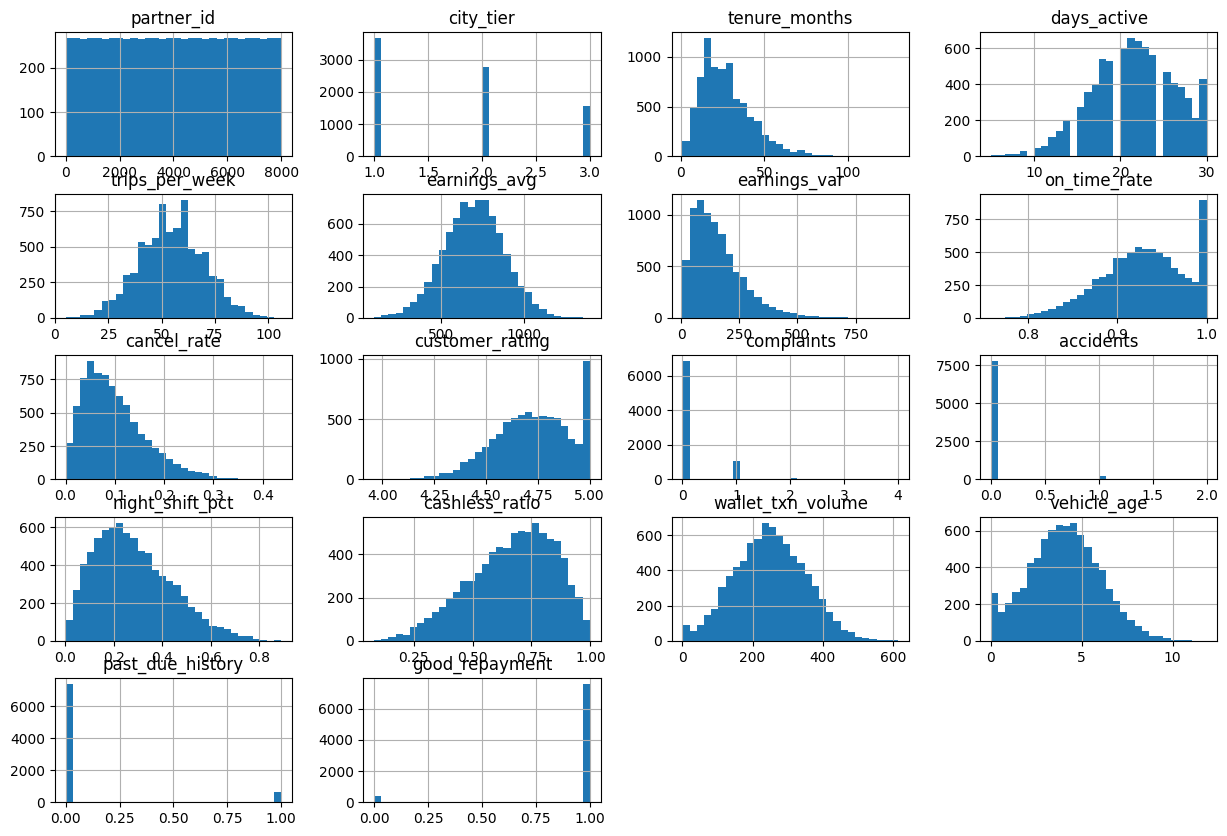

In [24]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols].hist(figsize=(15,10), bins=30)

array([[<Axes: title={'center': 'earnings_avg'}>,
        <Axes: title={'center': 'trips_per_week'}>],
       [<Axes: title={'center': 'on_time_rate'}>, <Axes: >]], dtype=object)

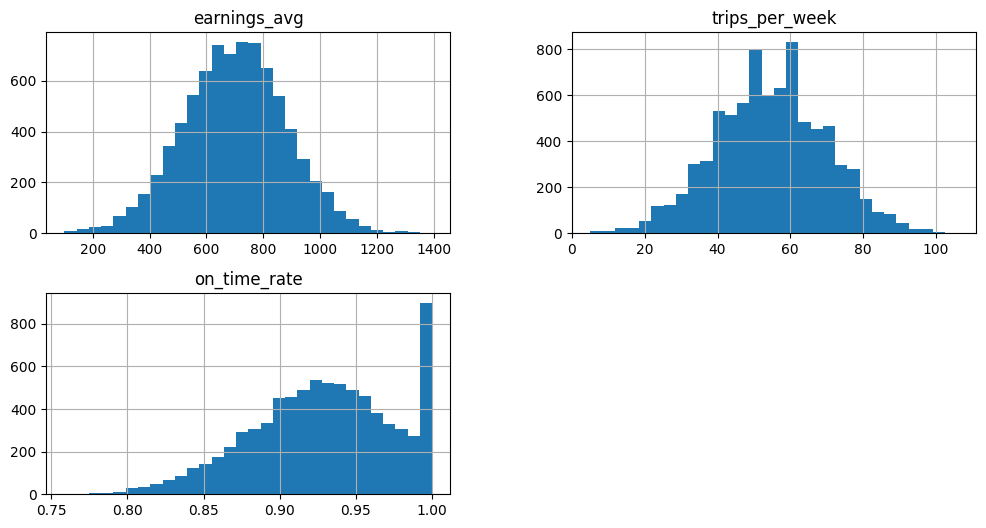

In [ ]:
df[['earnings_avg','trips_per_week','on_time_rate']].hist(bins=30, figsize=(12,6))

In [17]:
df['city_tier'].value_counts(normalize=True)

city_tier
1    0.457750
2    0.347625
3    0.194625
Name: proportion, dtype: float64

In [15]:
df['role'].value_counts()

role
driver      5674
merchant    2326
Name: count, dtype: int64

In [18]:
df['gender'].value_counts(normalize=True)

gender
M    0.748
F    0.252
Name: proportion, dtype: float64

<Axes: >

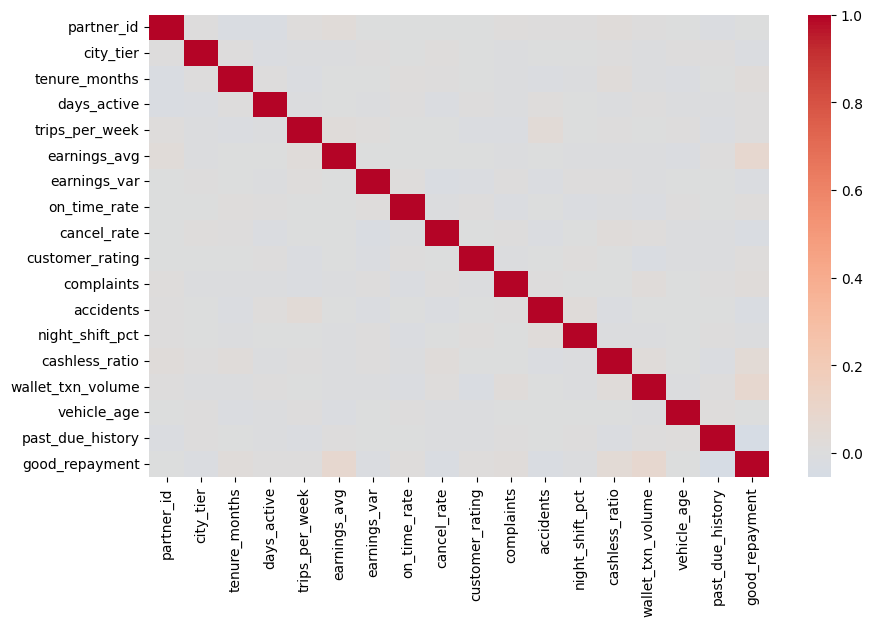

In [20]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)

In [21]:
df['good_repayment'].value_counts(normalize=True)

good_repayment
1    0.946
0    0.054
Name: proportion, dtype: float64